In [18]:
%cd /content
!rm -rf EVA-4
!git clone https://github.com/seepala98/EVA-4.git

!cd EVA-4/PHASE_1/S11/

/content
Cloning into 'EVA-4'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 732 (delta 48), reused 0 (delta 0), pack-reused 629
Receiving objects: 100% (732/732), 5.95 MiB | 35.86 MiB/s, done.
Resolving deltas: 100% (337/337), done.


In [19]:
%cd EVA-4/PHASE_1/S11/

/content/EVA-4/PHASE_1/S11


In [20]:
%ls

display.py         lr_finder.py  range_test.py  Transform_utils/
gradcam.py         models/       README.md      validation.py
load_transform.py  plot.py       train.py


# Import Library

In [0]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
!pip install albumentations

In [23]:
from Transform_utils import *
from Transform_utils.transform_albumentation import Data
data = Data()

trainset = data.getTrainDataSet(train=True)
testset =  data.getTestDataSet(train=False)
trainloader = data.getDataLoader(trainset, 512)
trainloader1 = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 512)
testloader1 = data.getDataLoader(testset, 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



plane   dog  deer  deer


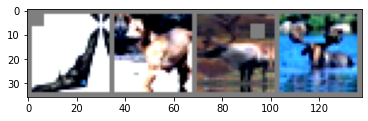

In [24]:
import display
# get some random training images
dataiter = iter(trainloader1)
#dataiter = iter(load_transform.trainloader_for_plot)
images, labels = dataiter.next()

# show images
display.imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

In [0]:
from models import custom_resnet


In [26]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = custom_resnet.cust_resnet().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14      

/content/EVA-4/PHASE_1/S11/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)


# Loss Function and optimization

2.0


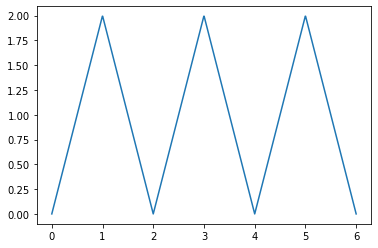

In [27]:
from Transform_utils.zigzag_plt import zigzag_plot

zigzag_plot(num_trianges = 3, min_val = 0, max_val = 2, triangle_base = 2)


In [28]:
from range_test import lr_range_test

lrs = [j*(10**i) for i in range(-3,-1) for j in range(1,11)]
lr_range_test(lrs,net,device,trainloader, testloader)


  0%|          | 0/98 [00:00<?, ?it/s]

LR: 0.001


/content/EVA-4/PHASE_1/S11/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)
  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.3301, Accuracy: 5164/10000 (51.64%)

LR: 0.002


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.2226, Accuracy: 5625/10000 (56.25%)

LR: 0.003


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.2031, Accuracy: 5742/10000 (57.42%)

LR: 0.004


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.1515, Accuracy: 5944/10000 (59.44%)

LR: 0.005


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.3193, Accuracy: 5195/10000 (51.95%)

LR: 0.006


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.2609, Accuracy: 5459/10000 (54.59%)

LR: 0.007


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.2815, Accuracy: 5353/10000 (53.53%)

LR: 0.008


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.4855, Accuracy: 4565/10000 (45.65%)

LR: 0.009000000000000001


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.3575, Accuracy: 5009/10000 (50.09%)

LR: 0.01


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.7893, Accuracy: 3298/10000 (32.98%)

LR: 0.01


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.5603, Accuracy: 4262/10000 (42.62%)

LR: 0.02


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.9916, Accuracy: 2697/10000 (26.97%)

LR: 0.03


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 2.1469, Accuracy: 2443/10000 (24.43%)

LR: 0.04


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 2.5809, Accuracy: 1392/10000 (13.92%)

LR: 0.05


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 2.4512, Accuracy: 1685/10000 (16.85%)

LR: 0.06


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 2.3402, Accuracy: 1097/10000 (10.97%)

LR: 0.07


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 2.3285, Accuracy: 1033/10000 (10.33%)

LR: 0.08


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 2.2820, Accuracy: 1348/10000 (13.48%)

LR: 0.09


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 2.2793, Accuracy: 1058/10000 (10.58%)

LR: 0.1


Loss=2.29 Batch ID=97 Accuracy=11.16: 100%|██████████| 98/98 [00:15<00:00,  6.33it/s]



Validation set: Average loss: 2.2959, Accuracy: 1128/10000 (11.28%)



TypeError: ignored

<Figure size 720x576 with 1 Axes>

LRs used for range  test :  [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
Train Accuracies :  [(38.996, tensor(1.4047, device='cuda:0', grad_fn=<NllLossBackward>)), (42.566, tensor(1.2325, device='cuda:0', grad_fn=<NllLossBackward>)), (44.342, tensor(1.2364, device='cuda:0', grad_fn=<NllLossBackward>)), (44.06, tensor(1.3294, device='cuda:0', grad_fn=<NllLossBackward>)), (38.264, tensor(1.2308, device='cuda:0', grad_fn=<NllLossBackward>)), (39.046, tensor(1.3420, device='cuda:0', grad_fn=<NllLossBackward>)), (40.326, tensor(1.3671, device='cuda:0', grad_fn=<NllLossBackward>)), (31.772, tensor(1.5658, device='cuda:0', grad_fn=<NllLossBackward>)), (33.034, tensor(1.4561, device='cuda:0', grad_fn=<NllLossBackward>)), (22.472, tensor(1.8013, device='cuda:0', grad_fn=<NllLossBackward>)), (28.962, tensor(1.4815, device='cuda:0', grad_fn=<NllLossBackward>)), (16.712, tensor(2.1282, device='cuda:0

# train and test

In [41]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
from train import train 
from validation import val

device= 'cuda' if torch.cuda.is_available() else 'cpu'
net = custom_resnet.cust_resnet().to(device)
# optimizer = optim.SGD(net.parameters(), lr=0.01,  momentum=0.9)
# scheduler = OneCycleLR(optimizer, max_lr=0.04,  total_steps=24,pct_start=0.2083, final_div_factor=1, div_factor=10)
optimizer = optim.SGD(net.parameters(),lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = OneCycleLR(optimizer, max_lr=0.04,  total_steps=25,pct_start=0.2083, final_div_factor=1e4, div_factor=10)
lrs=[]

for epoch in range(1, 25):
    curr_lr=optimizer.param_groups[0]['lr']
    lrs.append(curr_lr)
    print(f'Epoch: {epoch} Learning_Rate {curr_lr}')
    train_acc1 = train(net, trainloader, device, optimizer, epoch)
    test_acc1 = val(net, testloader, device)
    print('Test acc:', test_acc1)
    scheduler.step()

print('Finished Training')

  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate 0.003999999999999997


/content/EVA-4/PHASE_1/S11/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)
  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.5195, Accuracy: 4269/10000 (42.69%)

Test acc: (42.69, 1.5194744995117186)
Epoch: 2 Learning_Rate 0.00878875393313959


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.0491, Accuracy: 6385/10000 (63.85%)

Test acc: (63.85, 1.049092349243164)
Epoch: 3 Learning_Rate 0.020606997484540604


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.0577, Accuracy: 6731/10000 (67.31%)

Test acc: (67.31, 1.057727764892578)
Epoch: 4 Learning_Rate 0.033166435066472676


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 1.2125, Accuracy: 6837/10000 (68.37%)

Test acc: (68.37, 1.2124876922607422)
Epoch: 5 Learning_Rate 0.03978439377688042


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.9667, Accuracy: 7205/10000 (72.05%)

Test acc: (72.05, 0.9667483581542968)
Epoch: 6 Learning_Rate 0.039841977147438014


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.6334, Accuracy: 7969/10000 (79.69%)

Test acc: (79.69, 0.6334294250488282)
Epoch: 7 Learning_Rate 0.039195954237568234


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.5896, Accuracy: 8100/10000 (81.00%)

Test acc: (81.0, 0.5895696487426758)
Epoch: 8 Learning_Rate 0.03806732654261559


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.5448, Accuracy: 8236/10000 (82.36%)

Test acc: (82.36, 0.5448001602172852)
Epoch: 9 Learning_Rate 0.03648446914591465


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.4948, Accuracy: 8381/10000 (83.81%)

Test acc: (83.81, 0.4948046829223633)
Epoch: 10 Learning_Rate 0.03448717702214042


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.4964, Accuracy: 8448/10000 (84.48%)

Test acc: (84.48, 0.4964092544555664)
Epoch: 11 Learning_Rate 0.03212566454287803


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.6018, Accuracy: 8356/10000 (83.56%)

Test acc: (83.56, 0.6017993103027344)
Epoch: 12 Learning_Rate 0.029459303025785543


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.4089, Accuracy: 8692/10000 (86.92%)

Test acc: (86.92, 0.40888897399902346)
Epoch: 13 Learning_Rate 0.02655512806691114


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.4225, Accuracy: 8712/10000 (87.12%)

Test acc: (87.12, 0.4224595138549805)
Epoch: 14 Learning_Rate 0.023486154183659264


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.3802, Accuracy: 8794/10000 (87.94%)

Test acc: (87.94, 0.38015869598388674)
Epoch: 15 Learning_Rate 0.020329539140347054


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.3848, Accuracy: 8855/10000 (88.55%)

Test acc: (88.55, 0.3848021331787109)
Epoch: 16 Learning_Rate 0.017164644107455926


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.3336, Accuracy: 8919/10000 (89.19%)

Test acc: (89.19, 0.33355151824951174)
Epoch: 17 Learning_Rate 0.014071038424552075


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.3330, Accuracy: 8961/10000 (89.61%)

Test acc: (89.61, 0.3329947082519531)
Epoch: 18 Learning_Rate 0.011126499129581054


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.3166, Accuracy: 8990/10000 (89.90%)

Test acc: (89.9, 0.3165594253540039)
Epoch: 19 Learning_Rate 0.008405055548821514


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.3283, Accuracy: 9001/10000 (90.01%)

Test acc: (90.01, 0.32834891738891603)
Epoch: 20 Learning_Rate 0.005975128108902849


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.3191, Accuracy: 9023/10000 (90.23%)

Test acc: (90.23, 0.31908140716552735)
Epoch: 21 Learning_Rate 0.0038978081634335536


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.3155, Accuracy: 9068/10000 (90.68%)

Test acc: (90.68, 0.31549676895141604)
Epoch: 22 Learning_Rate 0.002225322081506724


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.3028, Accuracy: 9096/10000 (90.96%)

Test acc: (90.96, 0.30281595916748044)
Epoch: 23 Learning_Rate 0.0009997182127799507


  0%|          | 0/98 [00:00<?, ?it/s]


Validation set: Average loss: 0.2963, Accuracy: 9096/10000 (90.96%)

Test acc: (90.96, 0.296255850982666)
Epoch: 24 Learning_Rate 0.00025180974043651915


Loss=0.09 Batch ID=97 Accuracy=97.34: 100%|██████████| 98/98 [00:15<00:00,  6.17it/s]



Validation set: Average loss: 0.2948, Accuracy: 9104/10000 (91.04%)

Test acc: (91.04, 0.294770352935791)
Finished Training


# Plot Result

In [0]:
%matplotlib inline
import plot

GroundTruth:   deer  deer plane  ship


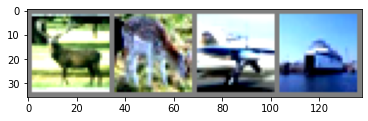

In [43]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

display.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [44]:
outputs = net(images.cuda())

/content/EVA-4/PHASE_1/S11/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)


In [45]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer  deer plane  ship


# Result Analysis


In [46]:
from display import OverallAcc
OverallAcc(testloader1,net)

/content/EVA-4/PHASE_1/S11/models/custom_resnet.py:74: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.log_softmax(x)


Accuracy of plane : 92 %
Accuracy of   car : 97 %
Accuracy of  bird : 86 %
Accuracy of   cat : 80 %
Accuracy of  deer : 90 %
Accuracy of   dog : 86 %
Accuracy of  frog : 94 %
Accuracy of horse : 93 %
Accuracy of  ship : 94 %
Accuracy of truck : 94 %
